In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers
from sklearn.model_selection import train_test_split

circles = pd.read_csv('Geom.csv')
circles.head()

,,.1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121
0,82,0,81.55081,8.571335,80.20810,17.04875,77.98663,25.33940,74.91074,33.35240,...,74.91058,-33.35272,77.98654,-25.33972,80.20804,-17.04910,81.55075,-8.571701,82,-0.000381
1,82,0,81.55078,8.571320,80.20813,17.04877,77.98663,25.33939,74.91071,33.35242,...,74.91058,-33.35272,77.98651,-25.33972,80.20801,-17.04910,81.55078,-8.571686,82,-0.000366
2,129,0,128.29330,13.484180,126.18100,26.82060,122.68630,39.86319,117.84740,52.46902,...,117.84720,-52.46951,122.68610,-39.86371,126.18090,-26.82115,128.29330,-13.484740,129,-0.000595
3,108,0,107.40840,11.289080,105.64000,22.45447,102.71410,33.37384,98.66290,43.92755,...,98.66272,-43.92796,102.71400,-33.37427,105.63980,-22.45493,107.40830,-11.289550,108,-0.000504
4,145,0,144.20570,15.156620,141.83140,30.14719,137.90320,44.80746,132.46410,58.97681,...,132.46390,-58.97736,137.90300,-44.80804,141.83130,-30.14783,144.20560,-15.157260,145,-0.000671


In [136]:
encoding_dim = 30

In [137]:
input_circle = keras.Input(shape=circles.shape[1],)
# "encoder" 
encoded = layers.Dense(encoding_dim, activation='leaky_relu')(input_circle)
# "decoder"
decoded = layers.Dense(circles.shape[1], activation='leaky_relu')(encoded)



In [138]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_circle, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_circle, encoded)

# input to the decoder model 
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='MSE')

In [139]:
#splitting the data 
x_train,x_test = train_test_split(circles,test_size=5,random_state=2)

In [140]:
autoencoder.fit(x_train, x_train,
                epochs=400,
                batch_size=256,
                shuffle=True,
               )


Epoch 1/400
1/1 [==============================] - 0s 202ms/step - loss: 6043.1519
Epoch 2/400
1/1 [==============================] - 0s 3ms/step - loss: 5809.7783
Epoch 3/400
1/1 [==============================] - 0s 3ms/step - loss: 5601.0225
Epoch 4/400
1/1 [==============================] - 0s 4ms/step - loss: 5413.0977
Epoch 5/400
1/1 [==============================] - 0s 3ms/step - loss: 5247.9238
Epoch 6/400
1/1 [==============================] - 0s 4ms/step - loss: 5101.4053
Epoch 7/400
1/1 [==============================] - 0s 2ms/step - loss: 4964.9253
Epoch 8/400
1/1 [==============================] - 0s 2ms/step - loss: 4829.7188
Epoch 9/400
1/1 [==============================] - 0s 5ms/step - loss: 4701.4097
Epoch 10/400
1/1 [==============================] - 0s 3ms/step - loss: 4581.2241
Epoch 11/400
1/1 [==============================] - 0s 3ms/step - loss: 4461.2671
Epoch 12/400
1/1 [==============================] - 0s 2ms/step - loss: 4346.5967
Epoch 13/400
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 204/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 205/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 206/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 207/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 208/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 209/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 210/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 211/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 212/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 213/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 214/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 215/400
1/1 [==============================] - 0

Epoch 302/400
1/1 [==============================] - 0s 3ms/step - loss: 3.6047e-05
Epoch 303/400
1/1 [==============================] - 0s 2ms/step - loss: 3.6038e-05
Epoch 304/400
1/1 [==============================] - 0s 2ms/step - loss: 3.6033e-05
Epoch 305/400
1/1 [==============================] - 0s 2ms/step - loss: 3.6035e-05
Epoch 306/400
1/1 [==============================] - 0s 2ms/step - loss: 3.6026e-05
Epoch 307/400
1/1 [==============================] - 0s 2ms/step - loss: 3.6021e-05
Epoch 308/400
1/1 [==============================] - 0s 2ms/step - loss: 3.6016e-05
Epoch 309/400
1/1 [==============================] - 0s 3ms/step - loss: 3.6008e-05
Epoch 310/400
1/1 [==============================] - 0s 3ms/step - loss: 3.6007e-05
Epoch 311/400
1/1 [==============================] - 0s 2ms/step - loss: 3.6000e-05
Epoch 312/400
1/1 [==============================] - 0s 2ms/step - loss: 3.5992e-05
Epoch 313/400
1/1 [==============================] - 0s 997us/step - loss: 3

In [141]:
#encoding the circle to smaller size
encoded_circles = encoder.predict(x_test)
#decode the circle to it's original size
decoded_circles = decoder.predict(encoded_circles)

In [142]:
decoded_circles.shape

(5, 122)

In [143]:
x_test = np.asarray(x_test)
x_test.shape

(5, 122)

In [144]:
#function returns the x point and y point of a given circle
def get_points(circle):
    
    X_list = []
    Y_list = []
    for row_ind,rows in enumerate(circle):
        x_point = []
        y_point = []
        for col_ind,col in enumerate(rows):
            if col_ind %2 ==0:
                x_point.append(circle[row_ind][col_ind])
            else:
                y_point.append(circle[row_ind][col_ind])
        X_list.append(x_point)
        Y_list.append(y_point)
    return np.array(X_list),np.array(Y_list)
                
            
            
        

In [145]:
#get the points of the decoded circles
x_decoded,y_decoded = get_points(decoded_circles)

#get the points of x_test
x_testp , y_testp =  get_points(x_test)

In [146]:
# getting max , min points of the decoded circles
min_x_decoded = min(x_decoded.flatten())
max_x_decoded = max(x_decoded.flatten())

max_y_decoded = max(y_decoded.flatten())
min_y_decoded = min(y_decoded.flatten())

max_x_decoded,max_y_decoded

(135.99252, 135.99336)

In [147]:
# getting max , min points of the decoded circles

min_x_test = min(x_testp.flatten())
max_x_test = max(x_testp.flatten())

max_y_test = max(y_testp.flatten())
min_y_test = min(y_testp.flatten())

max_x_test,max_y_test

(136.0, 136.0)

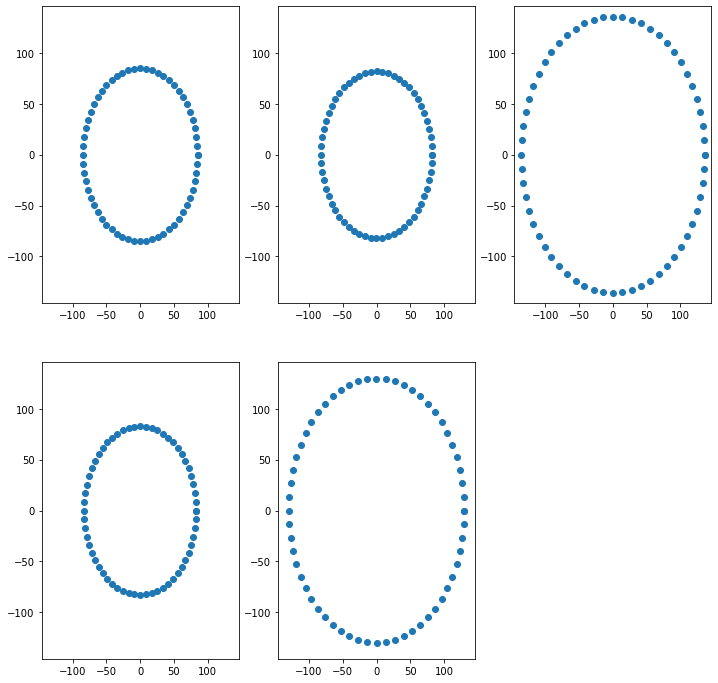

In [148]:
#plotting decoded circles

plt.figure(figsize=(12,12))

for i in range(len(x_decoded)):
    plt.subplot(2,3,i+1)
    plt.scatter(x_decoded[i],y_decoded[i])
    plt.xlim(min_x_decoded-10,max_x_decoded+10)
    plt.ylim(min_y_decoded-10,max_y_decoded+10)

    


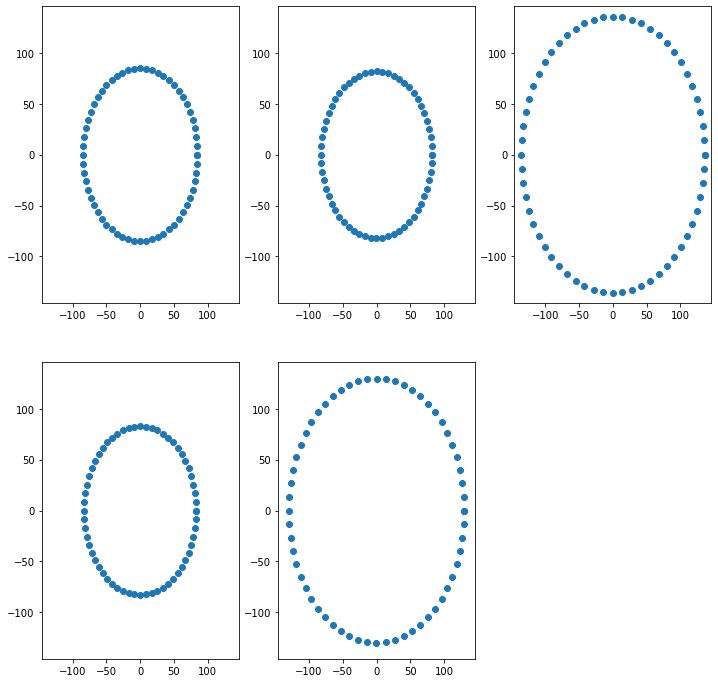

In [149]:
#plotting actual circles

plt.figure(figsize=(12,12))

for i in range(len(x_testp)):
    plt.subplot(2,3,i+1)
    plt.scatter(x_testp[i],y_testp[i])
    plt.xlim(min_x_test-10,max_x_test+10)
    plt.ylim(min_y_test-10,max_y_test+10)

    


In [150]:
from sklearn.metrics import mean_squared_error

#mean square error for every circle 
for i in range(5):
    resutlts = mean_squared_error(x_test[i],decoded_circles[i])
    print(('{:.8f}'.format(resutlts)))
    

0.00003629
0.00004544
0.00003983
0.00004226
0.00002371
